In [17]:
import json
import glob
from collections import Counter

In [9]:
fileN =glob.glob("MSTDN_oneday/*")

In [54]:
len(fileN)

37190

In [270]:
def split_word(text,NE=False):
    import MeCab
    #print(text)
    setting = '-Owakati -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd' if NE else '-Owakati'
    tagger = MeCab.Tagger(setting)
    tagger.parse('') #この過程ないとエンコード周りで死ぬ
    #import unicode
    #text = unicode.unicode(text,'utf_8')
    node = tagger.parseToNode(text)
    keywords = []
    while node:
        pos =node.feature.split(",")[0]
        if pos == '名詞':
            keywords.append(node.surface)
        node = node.next
    
    return keywords

In [343]:
sample_text='異教徒は排除しなくちゃ・・・'
import neologdn
sample_text = neologdn.normalize(sample_text)
split_word(sample_text)

['異教徒', '排除']

In [266]:
print(len(fileN))

37190


In [119]:
import re
P_pattern = '<p>(.*)</p>'
href_pattern = r'<a href="(.*)">(.*)</a>'
#test
f = open(fileN[9999])
MELMEL = json.load(f)
re.findall(P_pattern,MELMEL["content"])[0]

'異教徒は排除しなくちゃ・・・'

In [374]:
document=[]
account = []
for file_name in fileN:
    f = open(file_name)
    MELMEL = json.load(f)
    res = re.findall(P_pattern,MELMEL["content"])[0]
    res = neologdn.normalize(res)
    res = re.sub(href_pattern,"",res)
    res = res.replace("<br />","").replace("\u3000","")
    res = re.sub("\d*","",res)
    for numnum in ["一","二","三"]:
        res = res.replace(numnum,"")
    res = res.replace("*","").replace("_","").replace(".","").replace("ー","").replace("/","")
    res = split_word(res)
    document.append(res)
    f.close()

In [370]:
test="12345678ああああああ9ですねー"
re.sub("\d*","","test")

'test'

In [345]:
document[12345]

['カラオケ', 'ドリンク', 'バー', 'コンポタ', 'ところ']

In [22]:
user_counts = Counter(account)

In [37]:
usr_cnt={}

In [81]:
len(user_counts)
ind = 10

In [101]:
usr_cnt={}
for usr,cnt in user_counts.most_common():
    usr_cnt[usr] = cnt

In [102]:
usr_cnt["EzoeRyou"]

179

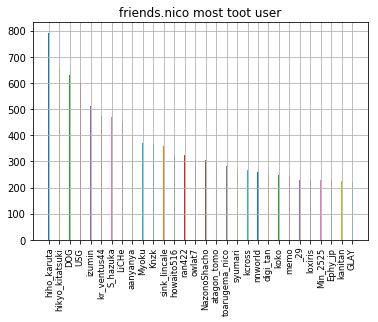

In [97]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cnt = 0
width= 1
label=[]
number = np.arange(0,300,10)
plt.grid()
plt.title("friends.nico most toot user")
for usr,count in user_counts.most_common()[:30]:
    ax.bar(
        number[cnt],
        count,
        width,
        label.append(usr)
    )
    cnt += 1
    #print(ind + width*cnt)
ticks = ax.set_xticks(number) #データ範囲のどこに目盛りが入るか
labels = ax.set_xticklabels(label,rotation =90,fontsize ="small")

In [85]:
import numpy as np
np.arange(0,100,10)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [47]:
list(usr_cnt.values())

[792,
 652,
 629,
 603,
 513,
 472,
 471,
 450,
 396,
 369,
 365,
 357,
 325,
 324,
 307,
 304,
 294,
 283,
 272,
 268,
 260,
 253,
 249,
 240,
 229,
 228,
 227,
 227,
 225,
 222]

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([ 12.,   6.,   3.,   1.,   3.,   1.,   1.,   2.,   0.,   1.]),
 array([ 222.,  279.,  336.,  393.,  450.,  507.,  564.,  621.,  678.,
         735.,  792.]),
 <a list of 10 Patch objects>)

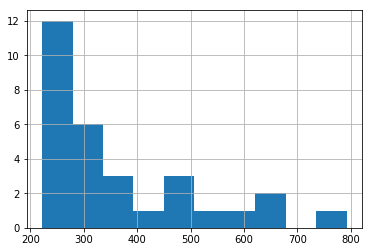

In [52]:
plt.grid()
plt.hist(list(usr_cnt.values()))

In [346]:
document

[['!', '時報', '!'],
 ['2017', '年', '04', '月', '25', '日', '12', '時'],
 ['gaura',
  '12',
  '時',
  'お伝え',
  '!',
  '▁▁▁╲▁╱▁▁▁',
  '▏▁▁▁▁▁▁▁▏',
  '▕▕●▏▏',
  '▕▕●▏▏',
  '▕▕▲▏▏',
  '▕▕▁▁▁▁▁▁▁▏▏',
  '▕▁▁▁▁▁▁▁▏',
  'U',
  'U',
  'ぴ',
  'ぴ',
  'ぴ',
  'ー',
  '!(',
  'AA',
  '提供',
  ':',
  '@',
  'hituzi',
  '25',
  '_',
  'CA',
  '@',
  'friends',
  '.',
  'nico',
  ')'],
 ['12', ':', '00', 'お伝え'],
 ['高田馬場', 'ん', '!', 'ん'],
 ['スガ', 'キヤ', 'ん', '?(', '純粋', ')'],
 ['颯爽'],
 ['昼', '休憩'],
 ['メルカリ', '離婚', '届', '出品', 'の', '理解', '役所', 'ただ'],
 ['正午', 'パオーン', ':', 'elephant', ':'],
 ['4', '.', '5', 'P', 'フォロー', '途端', 'ホーム', '加速'],
 ['!?'],
 ['前半', '戦'],
 ['!', 'コンビニ', 'ポット', '空', '!'],
 ['ニーッコニコ', '動画'],
 ['favicon', 'ブラウザ'],
 ['高田馬場', 'ゲーセン'],
 ['EZE', '出社'],
 ['時報', '流れ', 'ksk'],
 ['えな', 'メルカリ', '!', '何', '!('],
 ['子ども', '頃', '夢', 'ん'],
 ['主', '中部', '展開', 'ラーメン', '屋'],
 ['俺', '優勝', '!'],
 ['Bot', 'ネイティオ', 'ネイティオ', '?'],
 ['ゃり', 'ー', 'ろ', 'ろ', 'PONPONPON'],
 ['friends',
  '.',
  'nico',
  ':',
  '33',
  '

In [357]:
from gensim import corpora,models,similarities

In [375]:
dictionary = corpora.Dictionary(document)
dictionary.filter_extremes(3)

In [376]:
dictionary.save("mastodon_1day_nico.dict")

In [362]:
len(dictionary)

6077

In [335]:
dicionary.token2id

{'時報': 0,
 '2017': 1,
 '年': 2,
 '04': 3,
 '月': 4,
 '25': 5,
 '日': 6,
 '12': 7,
 '時': 8,
 'gaura': 9,
 'お伝え': 10,
 '▁': 11,
 '╲': 12,
 '╱': 13,
 '▏': 14,
 '▕': 15,
 '▕▕▲▏▏▕▕▁▁▁▁▁▁▁▏▏▕▁▁▁▁▁▁▁▏': 16,
 'ぴ': 17,
 'ー': 18,
 '！(': 19,
 'AA': 20,
 '提供': 21,
 ':': 22,
 'hituzi': 23,
 '_': 24,
 'CA': 25,
 '@': 26,
 'friends': 27,
 '.': 28,
 'nico': 29,
 ')': 30,
 '０': 31,
 '高田馬場': 32,
 'ん': 33,
 'スガ': 34,
 'キヤ': 35,
 '･･･？(': 36,
 '純粋': 37,
 '颯爽': 38,
 '昼': 39,
 '休憩': 40,
 'メルカリ': 41,
 '離婚': 42,
 '届': 43,
 '出品': 44,
 'の': 45,
 '理解': 46,
 '役所': 47,
 'ただ': 48,
 '正午': 49,
 'パオーン': 50,
 'elephant': 51,
 '4': 52,
 '5': 53,
 'P': 54,
 'フォロー': 55,
 '途端': 56,
 'ホーム': 57,
 '加速': 58,
 '前半': 59,
 '戦': 60,
 'コンビニ': 61,
 'ポット': 62,
 '空': 63,
 'ニーッコニコ': 64,
 '動画': 65,
 'favicon': 66,
 'ブラウザ': 67,
 'ゲーセン': 68,
 'EZE': 69,
 '出社': 70,
 '流れ': 71,
 'ｋｓｋ': 72,
 'えな': 73,
 '何': 74,
 '子ども': 75,
 '頃': 76,
 '夢': 77,
 '主': 78,
 '中部': 79,
 '展開': 80,
 'ラーメン': 81,
 '屋': 82,
 '俺': 83,
 '優勝': 84,
 'Bot': 85,
 'ネイティオ': 86,
 '

In [325]:
test_doc = "私は異教徒だから異教徒は排除しなくちゃ・・・"
dicionary.doc2bow(split_word(test_doc))

[(525, 1), (7507, 2), (9885, 1)]

In [350]:
len(document)

37190

In [377]:
corpus = [dictionary.doc2bow(text) for text in document]

In [351]:
len(corpus)

37190

In [330]:
len(corpus)
len(dictionary)

21444

In [379]:
import gensim
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=200, id2word=dictionary)
for topic in lda.show_topics(-1):
    print(topic)
'''
for topics_per_document in lda[corpus]:
    print(topics_per_document)
'''

(0, '0.363*"目" + 0.234*"配信" + 0.091*"ピマン" + 0.060*"Д" + 0.043*"流石" + 0.032*"さい" + 0.019*"視点" + 0.018*"|＼" + 0.016*"解像度" + 0.013*"ぶり"')
(1, '0.235*"大丈夫" + 0.142*"昼" + 0.122*"URL" + 0.057*"スレ" + 0.054*"あく" + 0.049*"す" + 0.042*"流" + 0.025*"っぱなし" + 0.024*"めし" + 0.022*"つる"')
(2, '0.198*"quot" + 0.178*";" + 0.148*"&" + 0.092*"飯" + 0.064*"テロ" + 0.035*"揚げ" + 0.034*"唐" + 0.034*"ェ" + 0.016*";｀)" + 0.015*"骨"')
(3, '0.282*"ちゃん" + 0.139*"結局" + 0.056*"サブ" + 0.048*"代" + 0.039*"完成" + 0.037*"当時" + 0.032*"ウェイ" + 0.032*"テレビ" + 0.029*"報告" + 0.029*"出演"')
(4, '0.426*"気" + 0.100*"万" + 0.085*"まとめ" + 0.060*"ステッカ" + 0.041*"有名" + 0.032*"誰か" + 0.028*"覧" + 0.025*"採用" + 0.021*"電子" + 0.015*"プログラム"')
(5, '0.201*"宣伝" + 0.153*"ぼく" + 0.114*"曲" + 0.089*"日産" + 0.062*"音楽" + 0.048*"ます" + 0.047*"死" + 0.027*"全力" + 0.023*"発明" + 0.020*"通"')
(6, '0.310*"名前" + 0.109*"精神" + 0.102*"欄" + 0.054*"偽装" + 0.052*"体感" + 0.044*"世紀" + 0.037*"危険" + 0.036*"淹" + 0.024*"科" + 0.023*"代わり"')
(7, '0.397*"p" + 0.192*">" + 0.192*"><" + 0.146*"<" + 0.0

'\nfor topics_per_document in lda[corpus]:\n    print(topics_per_document)\n'